<a href="https://colab.research.google.com/github/Love1117/Machine_learning-Projects/blob/main/Machine_Learning%20Project/03_Deep%20Learning%20Projects/Artificial%20Neural%20Network%20(ANN)/ANN%20for%20Classification/Customer_churn_prediction/Customer__churn_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

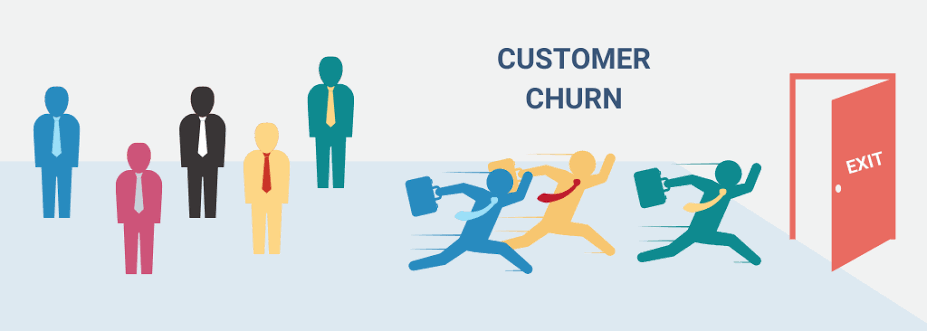
#**🧠 Customer Churn Prediction using Artificial Neural Network (ANN)**

**📘 Overview:**

This project uses a Deep Learning Artificial Neural Network (ANN) to predict customer churn — that is, whether a customer is likely to stop using a company’s services. By analyzing historical customer data such as demographics, account information, and usage behavior, the model learns complex patterns that distinguish between customers who stay and those who leave.

**🎯 Aim of the Project:**

The main aim is to build an intelligent system that predicts customer churn in advance, allowing businesses to take proactive actions such as offering discounts, improving customer service, or launching retention campaigns to reduce customer loss.


##**Data Loading and exploration**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/customer_churn.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


##**Customer Churn Analysis:** Visualizing Tenure's Impact and as well monthly charges impact

Customer With Short Tenure Seems To Stay With The Business Than Higher Once


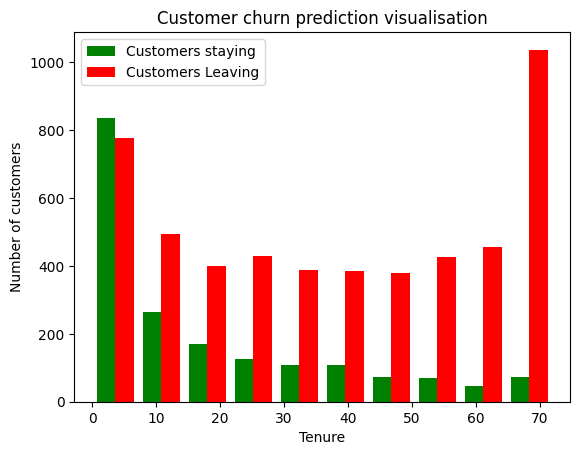





As Monthly Charges Increases Customers Tend To Leave The Business


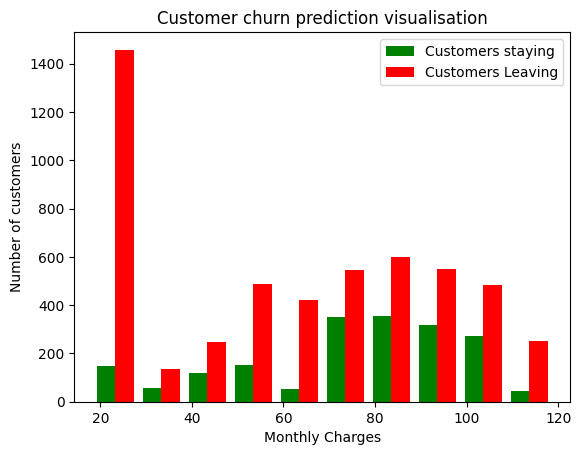

In [ ]:
tenure_churn_yes = df[df["Churn"] == "Yes"].tenure
tenure_churn_no = df[df["Churn"] == "No"].tenure

import matplotlib.pyplot as plt
%matplotlib inline

print("Customer With Short Tenure Seems To Stay With The Business Than Higher Once")

plt.hist([tenure_churn_yes, tenure_churn_no], color=["green", "red"], label=["Customers staying", "Customers Leaving"])
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer churn prediction visualisation")
plt.legend()
plt.show()

print("\n")
monthlycharge_churn_yes = df[df["Churn"] == "Yes"].MonthlyCharges
monthlycharge_churn_no = df[df["Churn"] == "No"].MonthlyCharges
import matplotlib.pyplot as plt
%matplotlib inline
print("\n")
print("As Monthly Charges Increases Customers Tend To Leave The Business")
plt.hist([monthlycharge_churn_yes, monthlycharge_churn_no], color=["green", "red"], label=["Customers staying", "Customers Leaving"])
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title("Customer churn prediction visualisation")
plt.legend()
plt.show()

##**Feature Engineering**

In [ ]:
df["MultipleLines"]= df["MultipleLines"].replace({"No phone service":"No"})
df["InternetService"]  = df["InternetService"].replace({"No internet service": "No"})
df.replace({"Yes":1, "No":0}, inplace=True)
df.replace({"Male":1, "Female":0}, inplace=True)
pd.set_option('display.max_columns', None)

df = pd.get_dummies(df, drop_first=True, columns=["PaymentMethod","Contract","InternetService"], dtype=int)

object1 = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
for col in object1:
  df[col] = pd.to_numeric(df[col], errors="coerce")

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dropna(inplace=True)


/tmp/ipython-input-3704980173.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Yes":1, "No":0}, inplace=True)
/tmp/ipython-input-3704980173.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Male":1, "Female":0}, inplace=True)


In [ ]:
#Checking to see if there is duplicates or Null values
print(f"Null_values: {df.isna().sum()}")
print("\n")
print(f"Duplicate values: {df.duplicated().sum()}")

Null_values: customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Contract_One year                        0
Contract_Two year                        

In [ ]:

x = df.drop(columns=["customerID","Churn"])
y = df["Churn"]

##**I noticed the target variable is imbalanced**

In [ ]:
#inbalanced target features
y.value_counts()

,count
Churn,
0,3756
1,1756


##**Fixing imbalance using Oversampling method**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

x = x_res
y = y_res

##**Verifying to see if my target variable dataset are balanced**

In [ ]:
y.value_counts()

,count
Churn,
0,3756
1,3756


##**Model Preparation: Spliting into train/test sets to evaluate performance.**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

##**Scaling features Using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
large = ["tenure","MonthlyCharges","TotalCharges"]
x_train[large] = scale.fit_transform(x_train[large])
x_test[large] = scale.fit_transform(x_test[large])

##**Model Building: training ANN (Deep Learning) Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([Dense(20, input_shape=(23,), activation="relu"),
                    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=50)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5937 - loss: 0.6542
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7501 - loss: 0.5209
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7609 - loss: 0.4936
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7779 - loss: 0.4729
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7712 - loss: 0.4804
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7823 - loss: 0.4719
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7881 - loss: 0.4583
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7711 - loss: 0.4675
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7897 - loss: 0.4518
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7863 - loss: 0.4576
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7890 - loss: 0.4567
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

##**Model score**

In [ ]:
model.evaluate(x_test, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4437


[0.43866896629333496, 0.796407163143158]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


##**Classification report: Accuracy / F1-Score | 80%**

In [ ]:
Cr = classification_report(y_test, y_pred)
print(Cr)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       752
           1       0.78      0.83      0.80       751

    accuracy                           0.80      1503
   macro avg       0.80      0.80      0.80      1503
weighted avg       0.80      0.80      0.80      1503



##**visualising using confusion matrix**

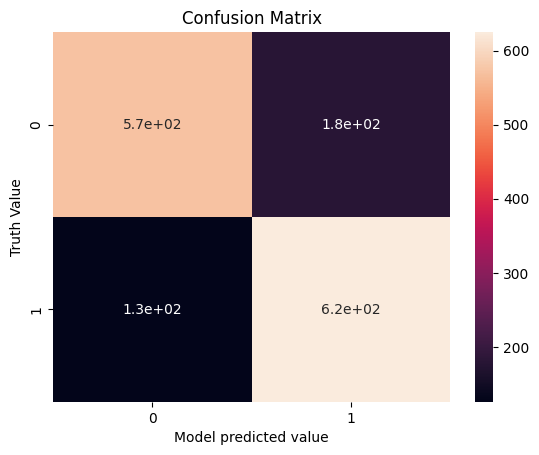

In [ ]:
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns

sns.heatmap(cm, annot=True)
plt.xlabel("Model predicted value")
plt.ylabel("Truth Value")
plt.title("Confusion Matrix")
plt.show()

##**📊 Model Performance:**
The ANN model achieved an evaluation accuracy of 80%, indicating strong performance in identifying customers at risk of churning. The model was trained and evaluated using proper data preprocessing, normalization, and validation techniques to ensure reliability.**


##**Conclusion (Deployment Use Case):**
When deployed, this model can be integrated into a company’s CRM or analytics system to automatically predict customer churn in real-time. It can help businesses prioritize retention efforts, improve customer satisfaction, and reduce revenue loss by identifying at-risk customers before they leave.

